# VirES - access to multi-mission spaceborne magnetic field measurements - public datasets

This notebook demonstrates access to CryoSat-2, GRACE 1/2, GRACE-FO 1/2 and Swarm A/B/C magnetic field measurements avaiable form the public VirES server.

In [1]:
from viresclient import SwarmRequest

SERVER_URL = 'https://vires.services/ows'

In [2]:
from matplotlib.pyplot import subplot, figure

class AttrDict(dict):
    def __getattr__(self, key):
        return self[key]

VECTORS = AttrDict({
    "B_NEC_CHAOS": ["B_N_CHAOS", "B_E_CHAOS", "B_C_CHAOS"],
    "B_NEC": ["B_N", "B_E", "B_C"],
    "B_NEC1": ["B_N1", "B_E1", "B_C1"],
    "B_NEC2": ["B_N2", "B_E2", "B_C2"],
    "B_NEC3": ["B_N3", "B_E3", "B_C3"],
})

def plot_magnetic_data(data, product_type):
    
    def _extract_variables(variables):
        return AttrDict({
            variable: data[variable].values
            for variable in variables if variable in data
        })
    
    def _plot(ax, x, y, title, xlabel, ylabel, **opts):
        ax.plot(x, y, '.', **opts)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_ylim([-250, 250])
        ax.set_xlim([-90, 90])
        ax.set_xticks([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
        ax.grid()
        return ax
        
    coords = _extract_variables(['Timestamp', 'Latitude', 'Longitude', 'Radius', 'QDLat', 'MLT'])
    models = _extract_variables(['F_CHAOS', 'B_NEC_CHAOS'])
    f_variables = _extract_variables(["F"])
    b_variables = _extract_variables(["B_NEC", "B_NEC1", "B_NEC2", "B_NEC3"])
    
    for variable, values in f_variables.items():
        delta = values - models.F_CHAOS
        
        #fig = figure()
        fig = figure(figsize=(18, 2), dpi=100)
        _plot(
            subplot(1, 1, 1),
            coords.QDLat, delta, ms=2,
            title=f'{product_type} - {variable}',
            ylabel=f"{variable} - F_CHAOS / nT",
            xlabel="QD-latitude / deg.",
        )


    for vvariable, values in b_variables.items():
        delta = values - models.B_NEC_CHAOS
        
        for idx, cvariable in enumerate(VECTORS[vvariable]):
        
            fig = figure(figsize=(18, 2), dpi=100)
            ax = subplot(1, 1, 1)
            _plot(
                ax, coords.QDLat, delta[:, idx], ms=2,
                title=f'{product_type} - {vvariable}',
                ylabel=f"{cvariable} - {VECTORS.B_NEC_CHAOS[idx]} / nT",
                xlabel="QD-latitude / deg.",
            )

## CryoSat-2 Data

avaiable data: 2010-08-01/2018-12-31

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.785MB)

<xarray.Dataset>
Dimensions:      (B_FGM1_dim1: 3, B_FGM2_dim1: 3, B_FGM3_dim1: 3, B_mod_NEC_dim1: 3, NEC: 3, Timestamp: 8640, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:05.272000 ... 20...
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM1_dim1, B_FGM2_dim1, B_FGM3_dim1, B_mod_NEC_dim1
Data variables: (12/19)
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_NEC_CHAOS  (Timestamp, NEC) float64 4.119e+03 2.974e+03 ... 3.767e+04
    MLT          (Timestamp) float64 10.84 10.88 10.91 ... 22.53 22.54 22.56
    Latitude     (Timestamp) float64 -58.84 -59.56 -60.04 ... 61.57 62.06 62.78
    B_NEC3       (Timestamp, NEC) float64 3.929e+03 2.849e+03 ... 3.767e+04
    q_error      (Timestamp) float64 4.642 5.272 5.717 ... 6.663 6.496 6.37
    ...           ...
    B_NEC1       (Timestamp, NEC) float64 3.926e+03 2.863e+03 ... 3.768e+04
  

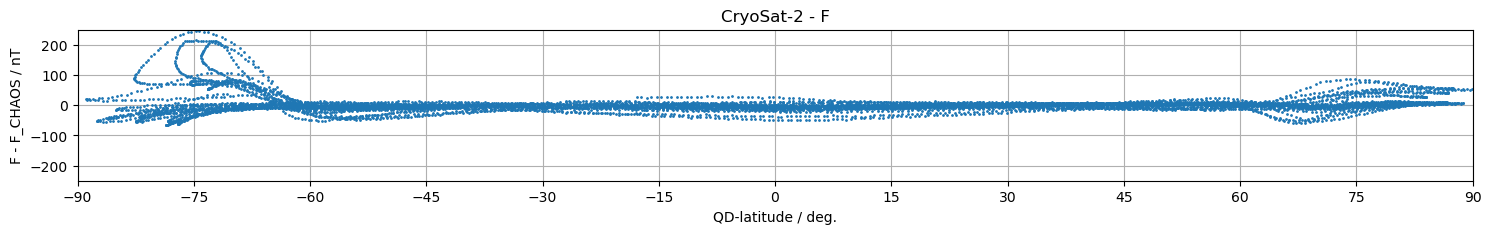

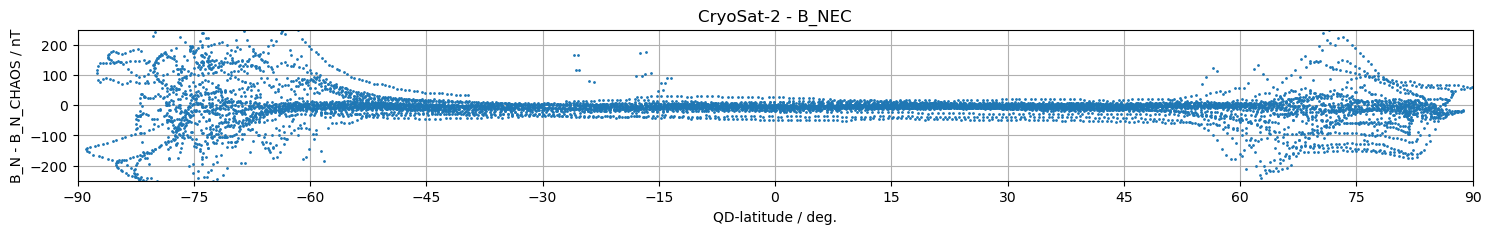

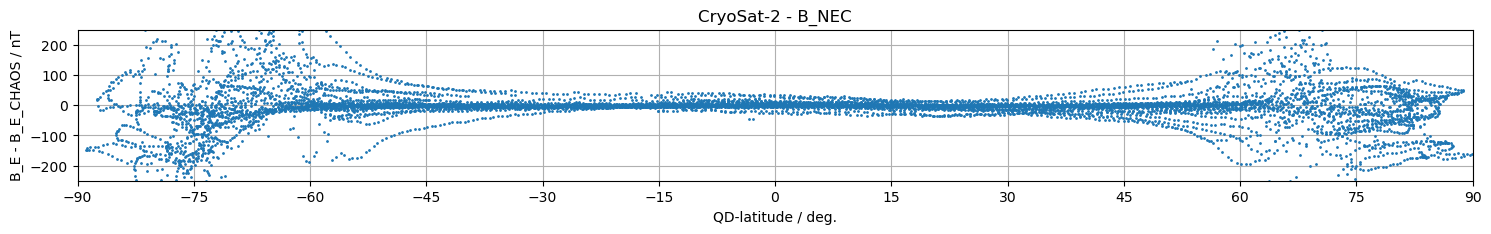

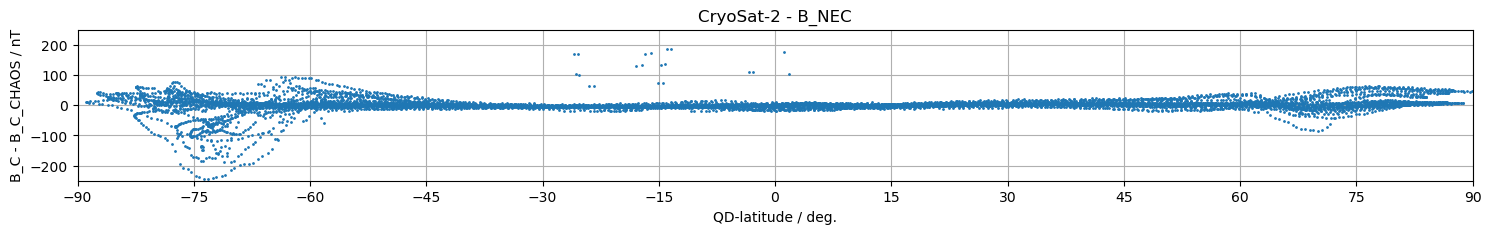

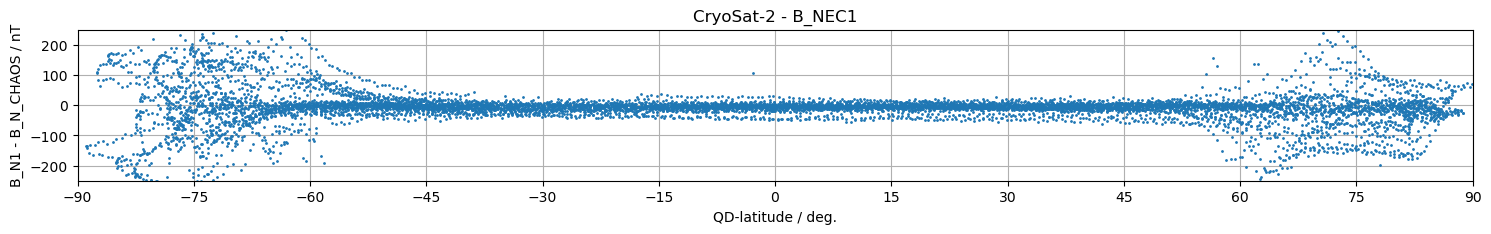

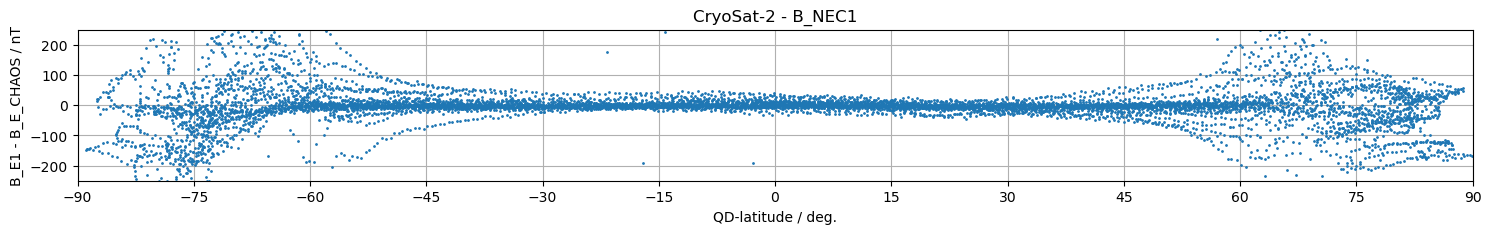

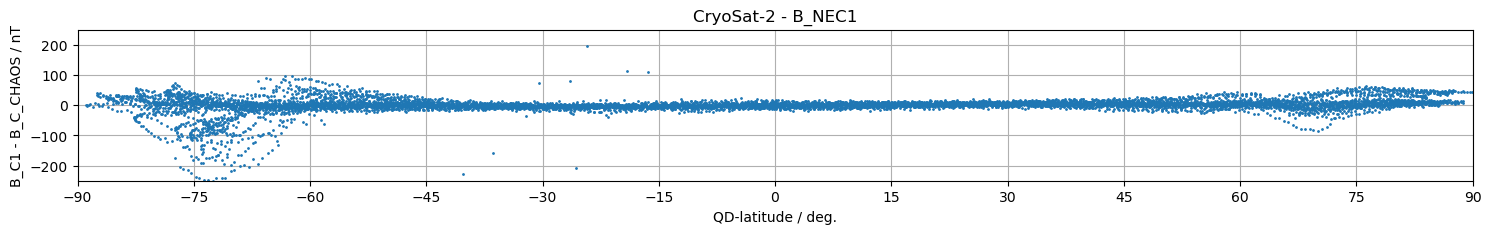

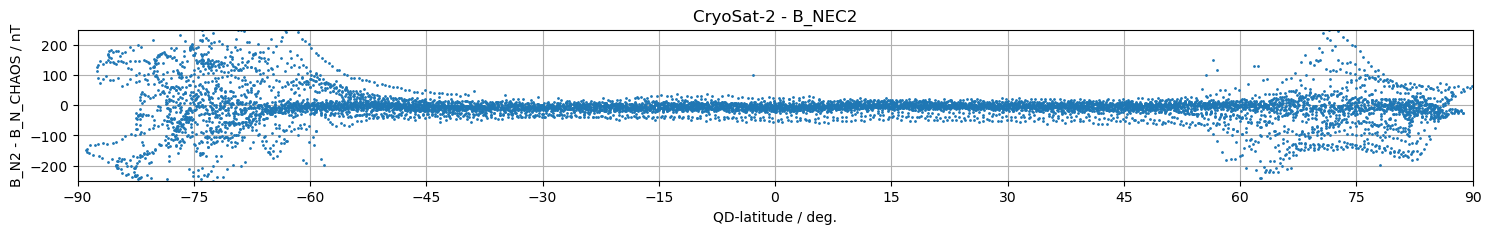

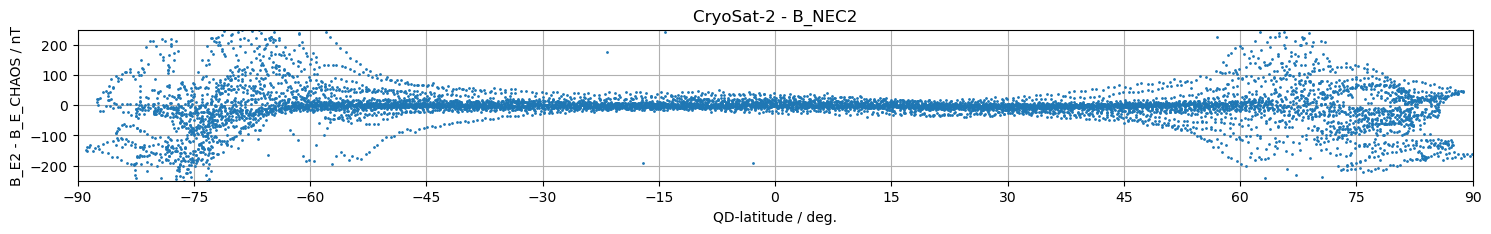

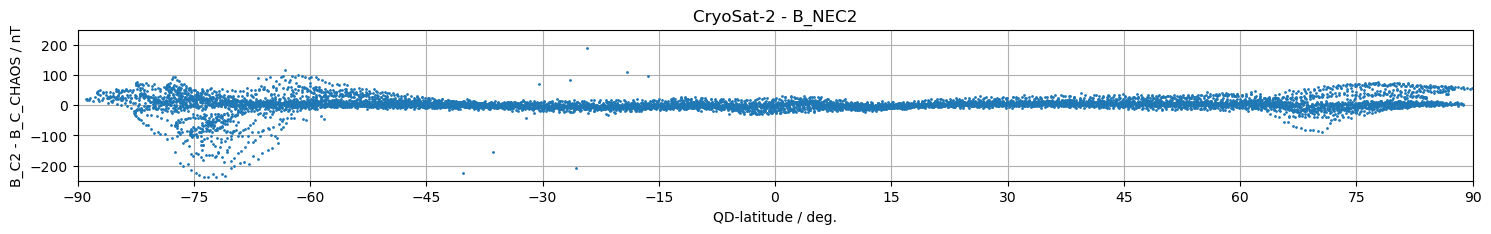

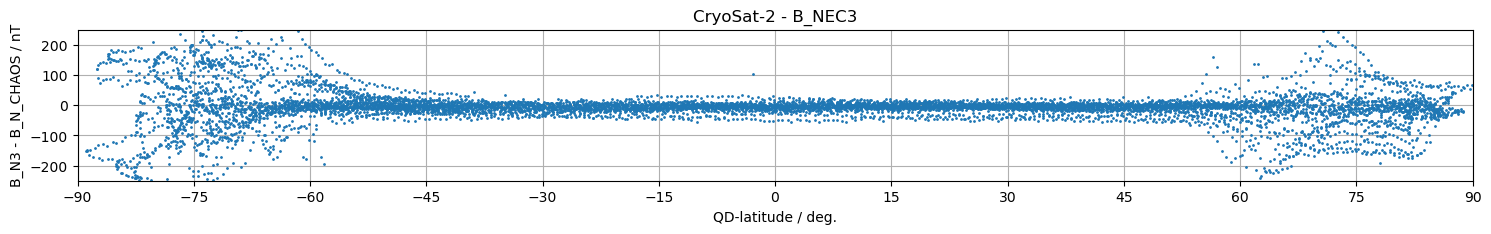

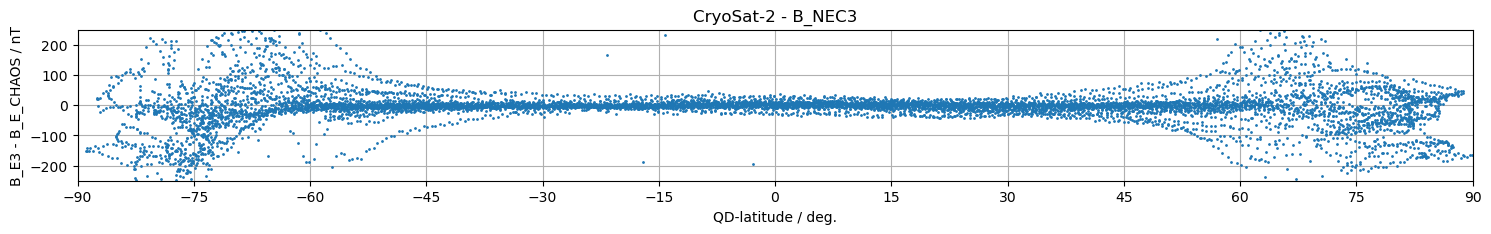

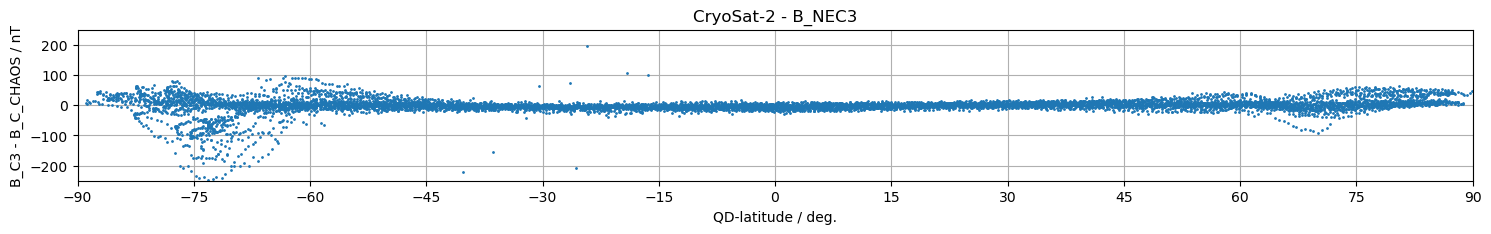

In [3]:

request = SwarmRequest(SERVER_URL)
request.set_collection("CS_OPER_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES['MAG_CS'],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT4S", # ~0.25Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CryoSat-2')

## GRACE 1 and 2
avaiable data: 
- GRACE 1: 2008-01-01/2017-10-31
- GRACE 1: 2008-01-01/2017-09-04

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (3.351MB)

<xarray.Dataset>
Dimensions:      (B_FGM_dim1: 3, NEC: 3, Timestamp: 16624, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:01.899195136 ......
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM_dim1
Data variables: (12/14)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.376e+04 6.55e+03 ... 2.423e+04
    MLT          (Timestamp) float64 19.59 19.58 19.57 ... 7.452 7.451 7.45
    B_NEC        (Timestamp, NEC) float64 1.395e+04 6.561e+03 ... 2.424e+04
    Latitude     (Timestamp) float64 -78.41 -77.57 -76.73 ... 27.21 26.55 25.9
    q_error      (Timestamp) float64 3.562e-05 7.145e-05 ... 5.866e-05 5.851e-05
    ...           ...
    B_FGM        (Timestamp, B_FGM_dim1) float64 1.39e+04 ... 2.365e+04
    q_NEC_CRF    (Timestamp, quaternion) float64 0.0009831 -0.008326 ... 0.9997
    F_CHAOS      (

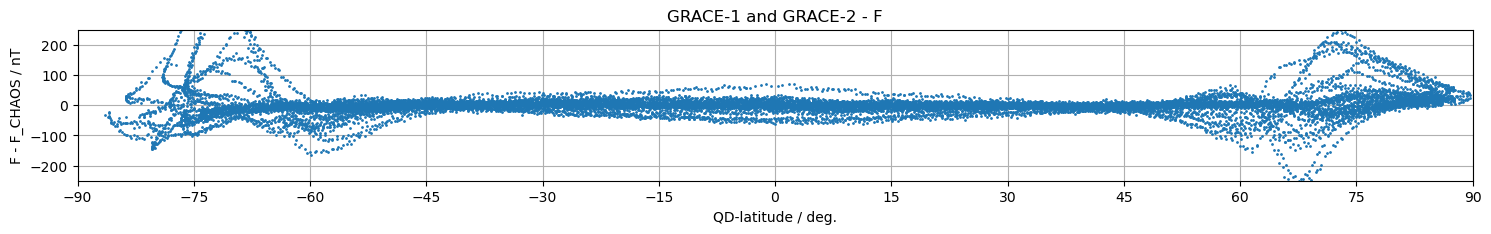

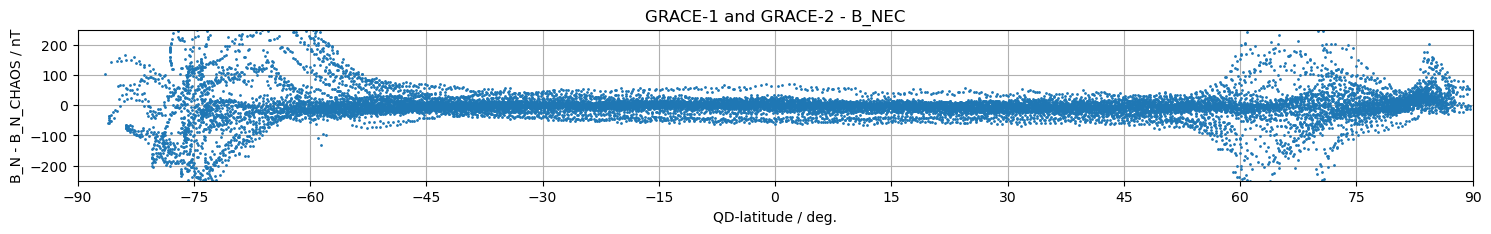

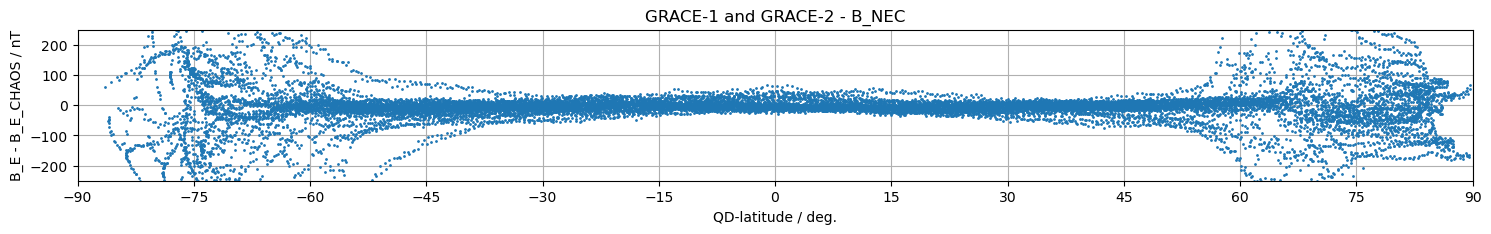

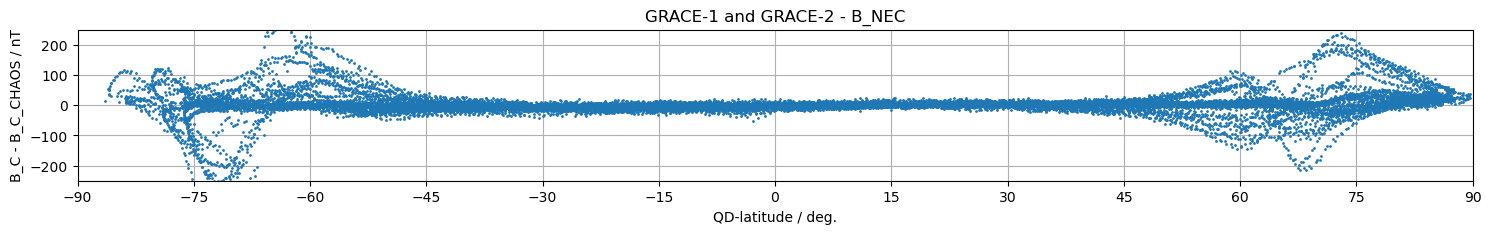

In [4]:

try:
    # temporary workaround
    request.PRODUCT_VARIABLES["MAG_GRACE"].remove('B_mod_NEC')
except ValueError:
    pass

request = SwarmRequest(SERVER_URL)
request.set_collection("GRACE_A_MAG", "GRACE_B_MAG") # request data from both GRACE 1 and 2 spacecrafts
#request.set_collection("GRACE_A_MAG") # request data from GRACE 1 spacecraft only
#request.set_collection("GRACE_B_MAG") # request data from GRACE 2 spacecraft only
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GRACE"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-1 and GRACE-2')

## GRACE-FO 1 and 2
avaiable data:
- GRACE-FO 1: 2018-06-01/2021-02-28
- GRACE-FO 2: 2018-06-01/2021-02-28

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (5.859MB)

<xarray.Dataset>
Dimensions:      (B_FGM_dim1: 3, NEC: 3, Timestamp: 17280, dB_BAT_FGM_dim1: 3, dB_BT_FGM_dim1: 3, dB_MTQ_FGM_dim1: 3, dB_NY_FGM_dim1: 3, dB_SA_FGM_dim1: 3, dB_ST_FGM_dim1: 3, dB_XI_FGM_dim1: 3, q_NEC_FGM_dim1: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:50
  * NEC          (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: B_FGM_dim1, dB_BAT_FGM_dim1, dB_BT_FGM_dim1, dB_MTQ_FGM_dim1, dB_NY_FGM_dim1, dB_SA_FGM_dim1, dB_ST_FGM_dim1, dB_XI_FGM_dim1, q_NEC_FGM_dim1
Data variables: (12/20)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.703e+04 -561.7 ... -4.616e+04
    MLT          (Timestamp) float64 18.88 18.88 18.88 ... 0.8968 1.359 1.809
    Latitude     (Timestamp) float64 -26.69 -27.33 -27.96 ... -74.58 -73.95
    Radius       (Timestamp) float64 6.873e+06 6.874e+06 ... 6.892e+06 6.892e+06
    dB_SA_FGM    (Timestamp, dB_SA_FGM_dim1) float64 

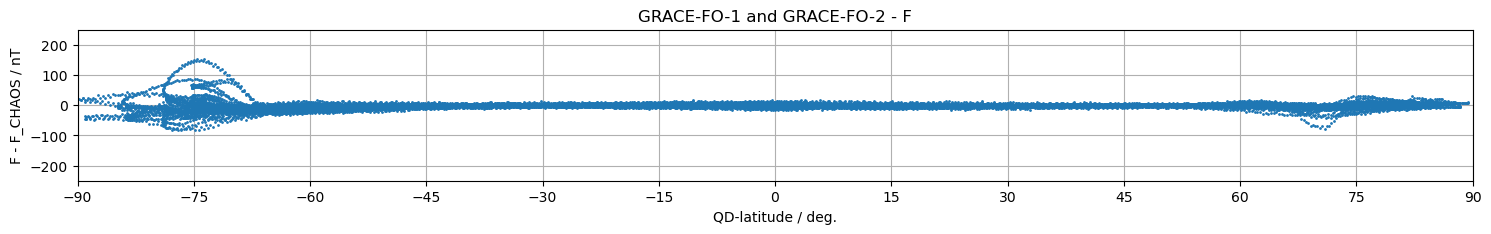

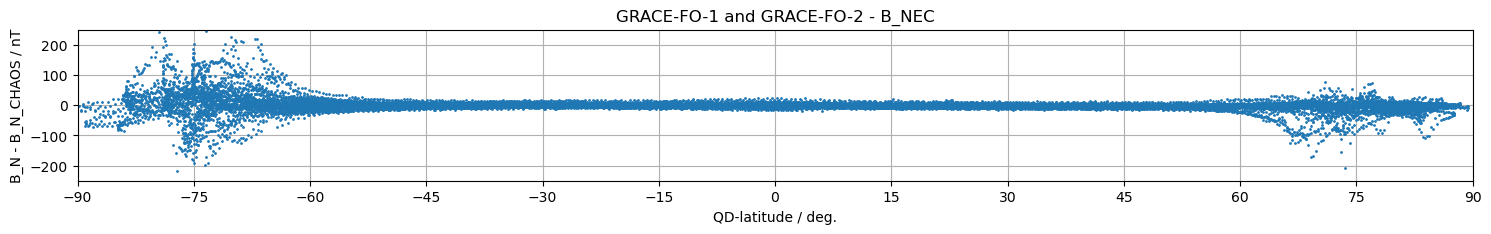

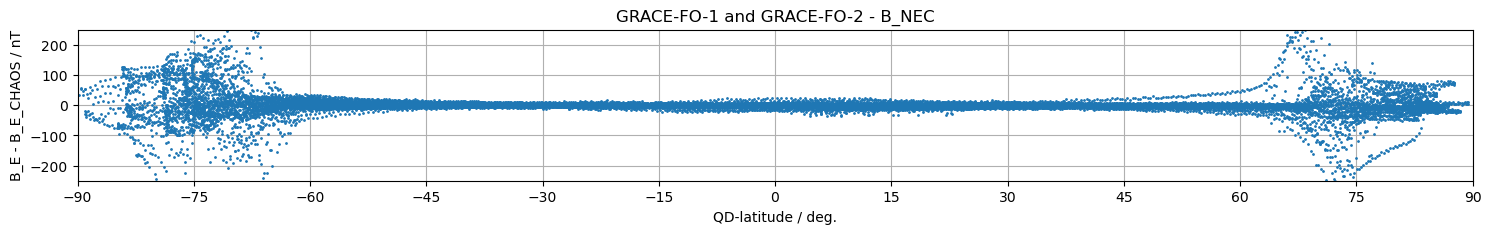

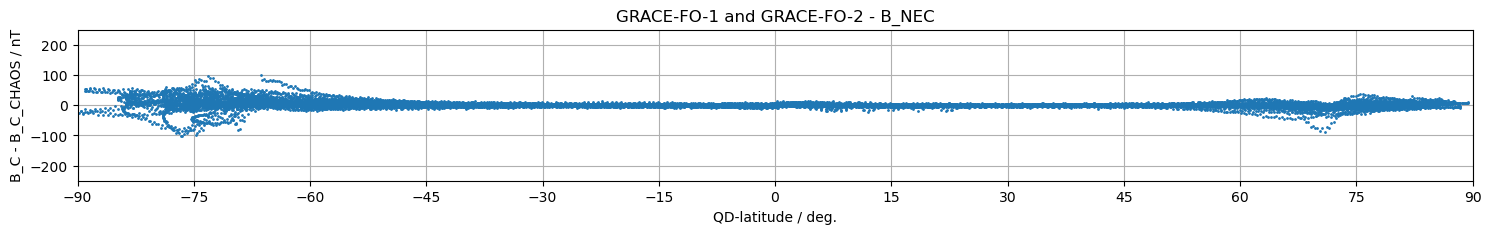

In [5]:
request = SwarmRequest(SERVER_URL)

request.set_collection("GF1_OPER_FGM_ACAL_CORR", "GF2_OPER_FGM_ACAL_CORR") # request data from both GRACE-FO 1 and 2 spacecrafts
#request.set_collection("GF1_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 1 spacecraft only
#request.set_collection("GF2_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 2 spacecraft only

request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GFO"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-FO-1 and GRACE-FO-2')

## Swarm A, B and C MAG LR 1Hz - regular products

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (8.049MB)

<xarray.Dataset>
Dimensions:         (NEC: 3, Timestamp: 25920, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:5...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables: (12/25)
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    B_NEC_CHAOS     (Timestamp, NEC) float64 2.367e+04 5.318e+03 ... 3.623e+04
    MLT             (Timestamp) float64 14.8 14.79 14.78 ... 2.511 2.512 2.514
    ASM_Freq_Dev    (Timestamp) float64 -1.0 -1.0 0.3 0.3 ... 0.0 0.0 0.0 0.0
    Flags_B         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    Latitude        (Timestamp) float64 -17.03 -16.39 -15.75 ... 44.71 44.07
    ...              ...
    q_NEC_CRF       (Timestamp, quaternion) float64 0.0003257 ... -0.02037
    Flags_q         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    At

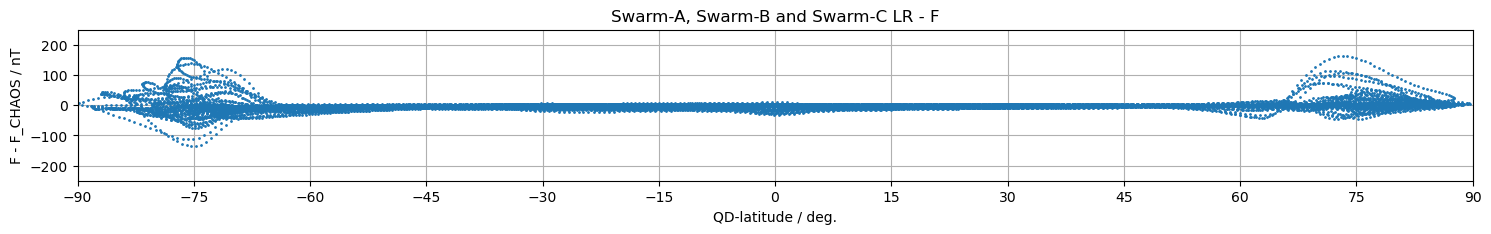

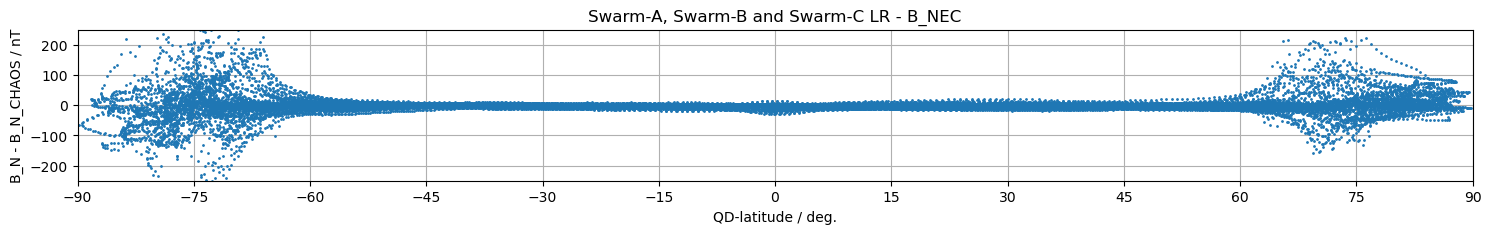

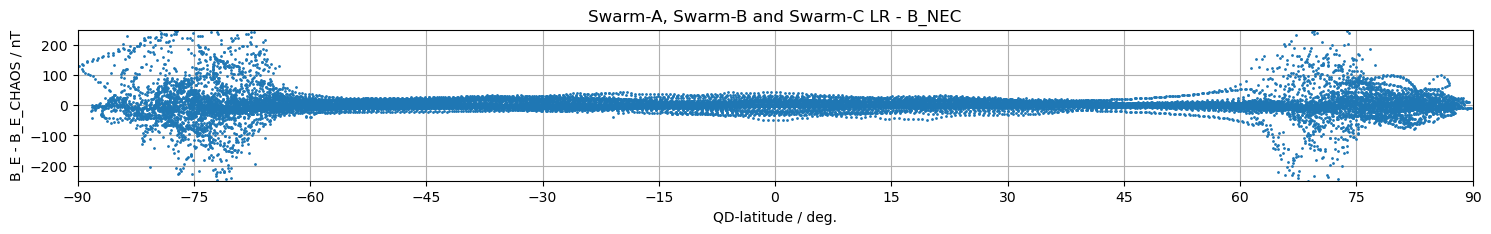

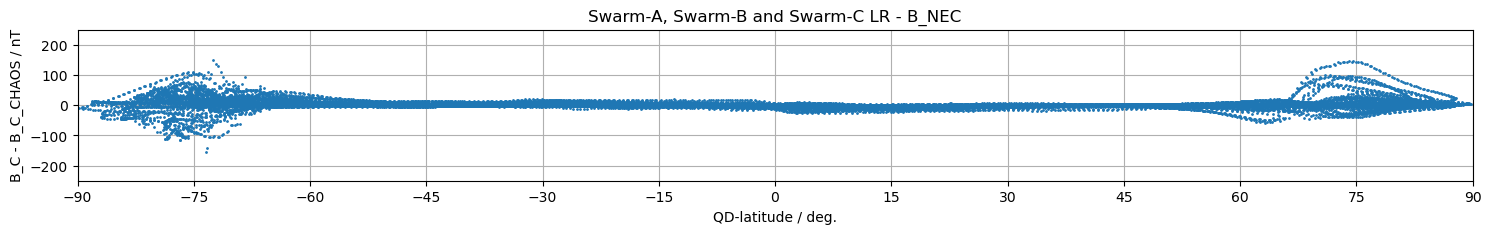

In [6]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C LR')

## Swarm A, B and C MAG HR 1Hz - regular products

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (7.191MB)

<xarray.Dataset>
Dimensions:         (NEC: 3, Timestamp: 25920, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:00.010499840 ...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables: (12/20)
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    B_NEC_CHAOS     (Timestamp, NEC) float64 2.368e+04 5.318e+03 ... 3.623e+04
    MLT             (Timestamp) float64 14.8 14.79 14.78 ... 2.511 2.512 2.514
    Flags_B         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    Latitude        (Timestamp) float64 -17.03 -16.39 -15.74 ... 44.71 44.07
    dB_AOCS         (Timestamp, VFM) float64 -0.6409 0.3359 ... -0.0907 2.501
    ...              ...
    q_NEC_CRF       (Timestamp, quaternion) float64 0.0003257 ... 0.02037
    Flags_q         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    Att

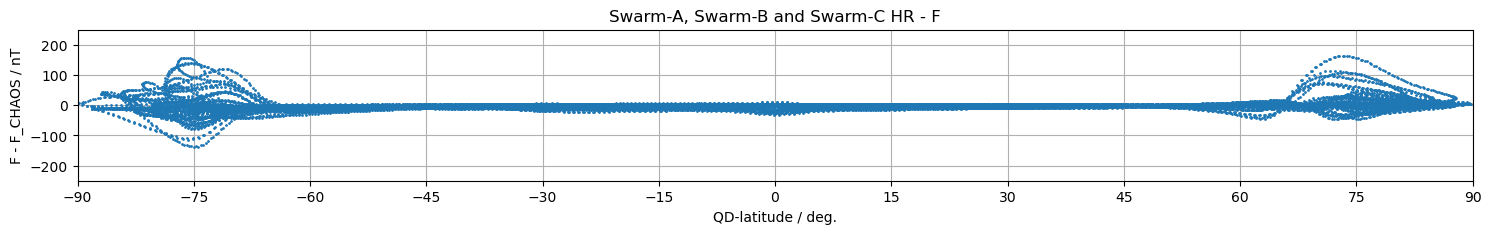

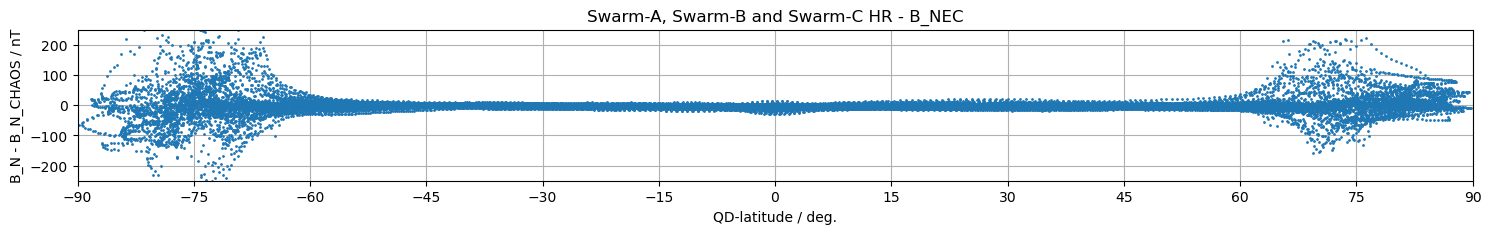

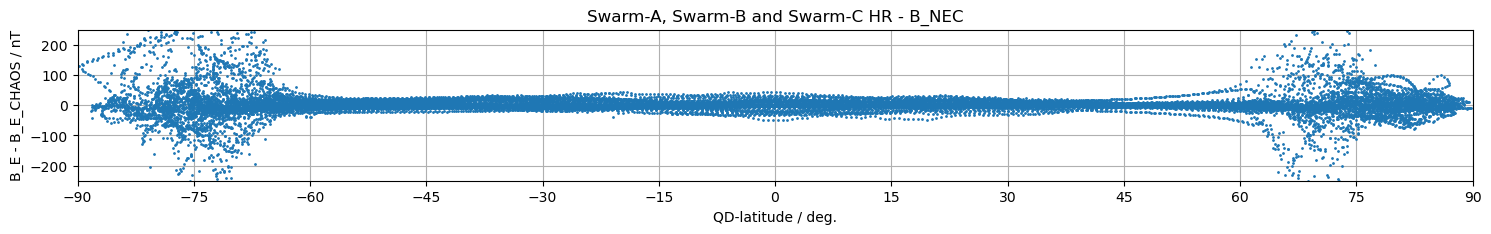

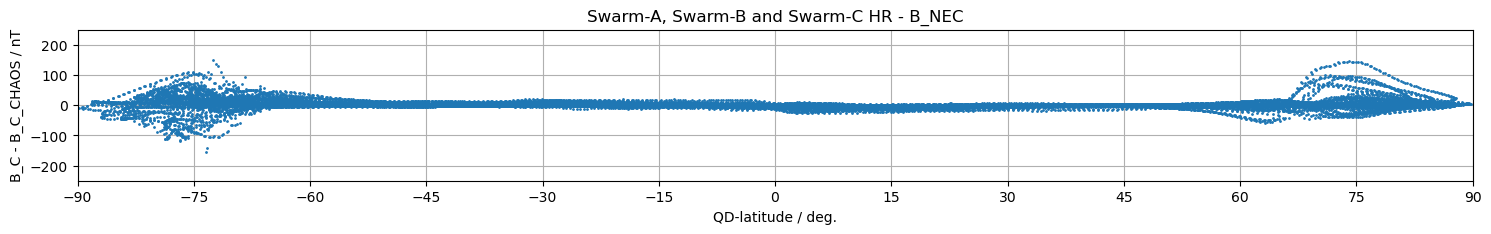

In [7]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG_HR"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_HR"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.02S", # ~50Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C HR')